# Full-scale Vecchia approximation parameters

## Packages

In [1]:
import torch
import gpytorch
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import os
import gpboost as gpb
import requests
import pandas as pd
import time

/usr/sepp1.5.1/scratch/tmp/365/FP_data/FSAVecchia/FSVA_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Flag for toy example
toy = True

## Data

In [3]:
# URL of the raw CSV file on GitHub
url = 'https://raw.githubusercontent.com/TimGyger/FSVA/refs/heads/main/Simulation/simulated_data_Gaussian_5.txt'

# Load the CSV file directly from the URL
df = pd.read_csv(url)

# Select the first 5 columns for X
X = df.iloc[:, :5]  # First 5 columns

# Select the last column for y
y = df.iloc[:, -1]  # Last column

# Convert to numpy:
X_np = X.to_numpy()
y_np = y.to_numpy()

if toy:
    X_np = X_np[1:10000,:]
    y_np = y_np[1:10000]

## Experiment

In [4]:
# Different inducing points
vector_ind_points = [0, 100, 200, 500]
# Different Vecchia neighbors
vector_neighbors = [5, 10, 15, 20, 30, 50]
# Zero matrix
matrix = np.zeros((len(vector_ind_points), len(vector_neighbors)))
matrix2 = np.zeros((len(vector_ind_points), len(vector_neighbors)))
# Nested loop to iterate over both vectors
for i, val1 in enumerate(vector_ind_points):
    for j, val2 in enumerate(vector_neighbors):
        print(i)
        print(j)
        if val1 == 0:
            # Vecchia
            model_vecchia = gpb.GPModel(gp_coords=X_np, cov_function="gaussian_ard", 
                                     likelihood="gaussian",num_neighbors = val2,
                                     matrix_inversion_method = "cholesky", gp_approx="vecchia",seed = 10)
            neg_vecchia = model_vecchia.neg_log_likelihood(cov_pars = np.array([1, 1.0, 0.15, 0.30,0.45,0.60,0.75]), y = y_np)
            matrix[i, j] = neg_vecchia
            matrix2[i, j] = neg_vecchia
        else:
            # FSVecchia with euclidean-based neighbor search
            model_fsva = gpb.GPModel(gp_coords=X_np, cov_function="gaussian_ard", 
                                     likelihood="gaussian",num_neighbors = val2,num_ind_points = val1,ind_points_selection = "kmeans++",
                                     matrix_inversion_method = "cholesky", gp_approx="full_scale_vecchia",seed = 2)
            neg_fsva = model_fsva.neg_log_likelihood(cov_pars = np.array([1, 1.0, 0.15, 0.30,0.45,0.60,0.75]), y = y_np)
            matrix[i, j] = neg_fsva
            # FSVecchia with correlation-based neighbor search
            model_fsva = gpb.GPModel(gp_coords=X_np, cov_function="gaussian_ard", 
                                     likelihood="gaussian",num_neighbors = val2,num_ind_points = val1,ind_points_selection = "kmeans++",
                                     matrix_inversion_method = "cholesky", gp_approx="full_scale_vecchia",seed = 4)
            neg_fsva = model_fsva.neg_log_likelihood(cov_pars = np.array([1, 1.0, 0.15, 0.30,0.45,0.60,0.75]), y = y_np)
            matrix2[i, j] = neg_fsva
            

0
0
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.231803 
[GPBoost] [Info] End neighbour search re
0
1
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.184617 
[GPBoost] [Info] End neighbour search re
0
2
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.185782 
[GPBoost] [Info] End neighbour search re
0
3
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.173376 
[GPBoost] [Info] End neighbour search re
0
4
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.265032 
[GPBoost] [Info] End neighbour search re
0
5
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.258469 
[GPBoost] [Info] End neighbour search re
1
0
[GPBoost] [Info] Starting kmeans++ algorithm for determining induc

[GPBoost] [Info] kNN time until = 1.31549 
[GPBoost] [Info] End neighbour search
[GPBoost] [Info] End neighbour search re
2
4
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.24121 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] Start neighbour search
[GPBoost] [Info] start
[GPBoost] [Info] CT time until = 0.258497 
[GPBoost] [Info] kNN time until = 1.36533 
[GPBoost] [Info] End neighbour search
[GPBoost] [Info] End neighbour search re
2
5
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points 

### Plot

/tmp/ipykernel_3991967/246726179.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Greys")  # You can choose different colormaps like "viridis", "plasma", etc.


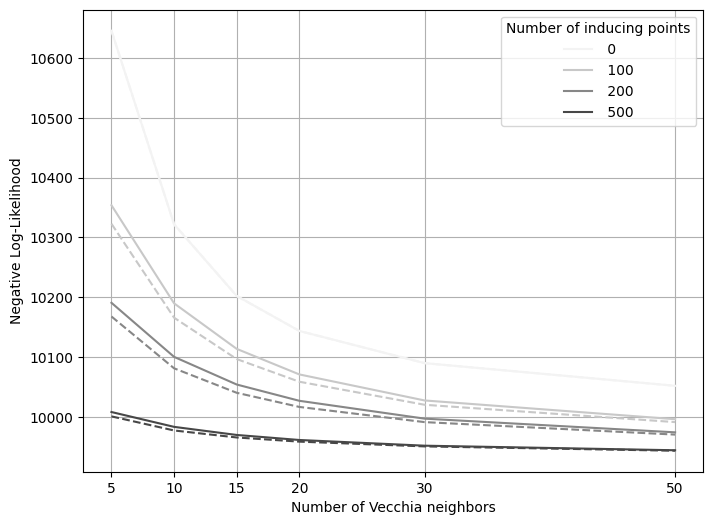

In [5]:
# Plotting the matrix
fig, ax = plt.subplots(figsize=(8, 6))

# Define a colormap (darker colors for larger values in vector1)
cmap = plt.cm.get_cmap("Greys")  # You can choose different colormaps like "viridis", "plasma", etc.
new_cmap = colors.LinearSegmentedColormap.from_list("mycmap", cmap(np.linspace(0.1, 1, 256)))
# Loop over each row (for each value of vector1) and plot a line
for i, row in enumerate(matrix):
    # Normalize the color intensity based on the value of vector1
    color_intensity = i / len(vector_ind_points)  # Darker as index increases
    ax.plot(vector_neighbors, row, label=f' {vector_ind_points[i]}', color=new_cmap(color_intensity))

for i, row in enumerate(matrix2):
    color_intensity = i / len(vector_ind_points)  # Darker as index increases
    ax.plot(vector_neighbors, row, linestyle='--', color=new_cmap(color_intensity))

# Adding labels and title
ax.set_xlabel("Number of Vecchia neighbors")
ax.set_ylabel("Negative Log-Likelihood")
ax.set_title("")

# Enable grid
ax.grid(True)

# Show legend
ax.legend(title="Number of inducing points")
plt.xticks(vector_neighbors)
# Show the plot
plt.show()